/home/vscode/.local/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


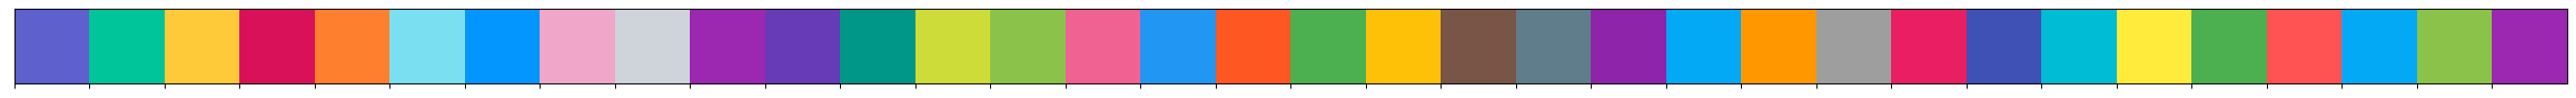

In [1]:
import numpy as np
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
import random
from base import *
from umap_func import *

In [2]:
# list of all the files
data_folder = "clean_template_npy/all_neurons/"
response_cluster_file = "cluster_assignment_final.csv"
umap_file = "umap_df.csv"
metadata_file = "all_info.json"
index_info_file = "rec_info_index.json"
bad_spike_indx = "bad_spike_index.npy"

slice_rec = ["Hc112823_avv9hckcr1_21841_120323_1", 
             "Hc112823_avv9hckcr1_21841_120323_2", 
             "Hc112823_avv9hckcr1_21841_120323_3"]
response_color_marker = {-1: ("k", "x"),    # outlier
                          0: ("C0", "."),   # opto-responsive
                          1: ("C1", "."),   # weakly opto-responsive
                          2: ("C2", "."),   # opto-responsive
                          3: ("C3", "."),   # unresponsive
                          4: ("C4", ".")}   # weakly opto-responsive

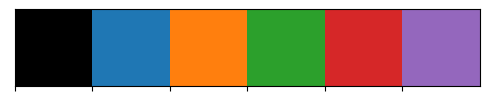

In [3]:
sns.palplot([v[0] for _, v in response_color_marker.items()])

In [4]:
# testing cell
# read Alex's cluster_assignment.csv on opto response 
response_cluster = pd.read_csv(data_folder + response_cluster_file, index_col=0)
print(response_cluster)
resp_cluster = response_cluster["unit"]["Hc112823_avv9hckcr1_21841_120323_1"]
print(resp_cluster)
# get unique values in the cluster
print(np.unique(response_cluster["cluster"]["Hc112823_avv9hckcr1_21841_120323_1"]))
# check nan or inf
print(np.isnan(resp_cluster).any())
print(np.isinf(resp_cluster).any())
# check if there is any -2
print(np.sum(resp_cluster == -2))


                                        unit  cluster   mean_pre  mean_post  \
exp                                                                           
2023_04_04_hc328_hckcr1-2_2                0       -1   2.300000   0.050000   
2023_04_04_hc328_hckcr1-2_2                1       -1   7.350000   0.000000   
2023_04_04_hc328_hckcr1-2_2                5       -1   1.500000   0.000000   
2023_04_04_hc328_hckcr1-2_2                6       -1   2.100000   0.050000   
2023_04_04_hc328_hckcr1-2_2                7       -1   2.650000   0.200000   
...                                      ...      ...        ...        ...   
Hc120523_aav9hckcr1_chip21774_121123_0     4       -1   0.811111   0.022222   
Hc120523_aav9hckcr1_chip21774_121123_0     5       -1  39.544444  38.877778   
Hc120523_aav9hckcr1_chip21774_121123_0     6       -1   6.788889   1.033333   
Hc120523_aav9hckcr1_chip21774_121123_0     7       -1   9.111111  10.177778   
Hc120523_aav9hckcr1_chip21774_121123_0     8       -

In [5]:
# read Alex's cluster_assignment.csv on opto response 
response_cluster = pd.read_csv(data_folder + response_cluster_file, index_col=0)
# read umap_df.csv
umap_df = pd.read_csv(data_folder + umap_file, index_col=0)
# get keys from umap_df
keys = umap_df.keys()
# add one more key "resp_cluster" to umap_df
keys = np.append(keys, "resp_cluster")
# creaet an empty dataframe using the same keys as umap_df
umap_resp_df = pd.DataFrame(columns=keys)
# read all_info.json
with open(data_folder + metadata_file) as f:
    all_temp_info = json.load(f)
# read rec_info_index.csv
with open(data_folder + index_info_file) as f:
    rec_info_index = json.load(f)
# load bad spike index
bad_spike_index = np.load(data_folder + bad_spike_indx)

In [6]:
# create a cluster csv for Alex to run mutual information test
cluster_csv = {"exp":[], "id": [], "cluster": []}

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 85, 86, 88, 89, 90, 91, 92, 94, 96, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 118, 119, 120, 121, 122, 124, 125, 127, 129, 130, 131, 132, 133, 134, 136, 137, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 220, 221, 222, 227]
[-1, -1, -1, 2, 3, -1, 2, -1, 2, 3, 2, 2, 4, -1, 2, -1, 2, 2, 3, 2, 2, -1, 2, -1, 2


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 76, 77, 78, 79, 80, 82, 84, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 

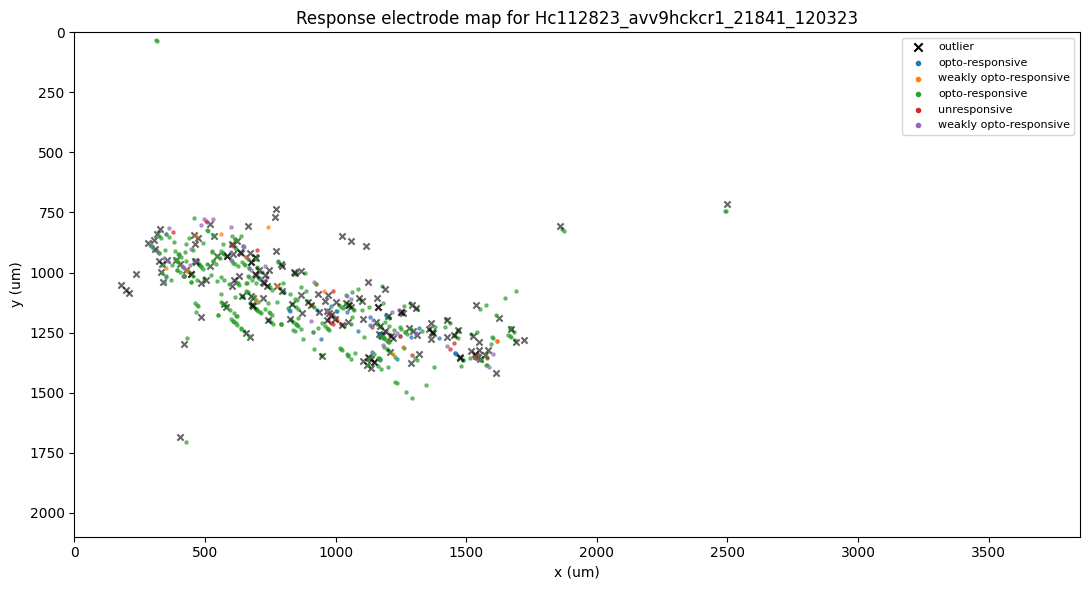

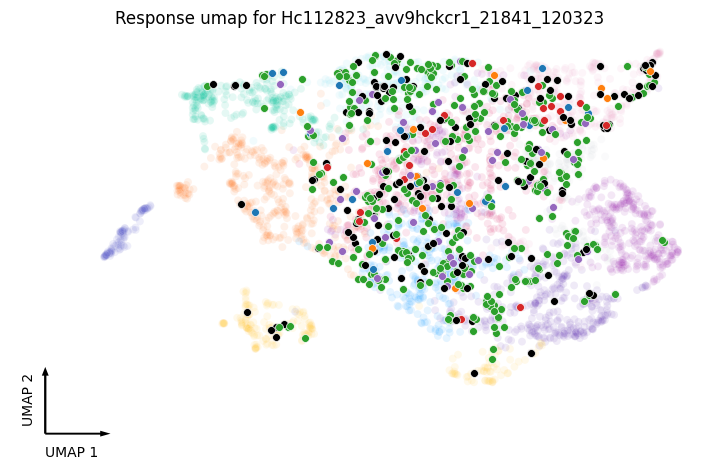

In [7]:
fig1, ax1 = plt.subplots(1, 1, figsize=(11, 6), tight_layout=True)
ax1.set_title("Response electrode map for Hc112823_avv9hckcr1_21841_120323")
fig2, ax2 = plt.subplots(1, figsize=[7, 4.5], tight_layout={'pad': 0})
fig2.tight_layout()
ax2.set_title("Response umap for Hc112823_avv9hckcr1_21841_120323")
# # plot umap as grey background
# ax2.scatter(umap_df['x'].tolist(), umap_df['y'].tolist(),
#                 marker='o', c="grey", s=32, edgecolor="white", alpha=0.2,
#                 linewidth=0.5)
# plot colored background with transparency
cluster_colors = [CUSTOM_PAL_SORT_3[i] for i in umap_df['color']]
ax2.scatter(umap_df['x'].tolist(), umap_df['y'].tolist(),
                marker='o', c=cluster_colors, s=32, edgecolor='w',
                linewidth=0.5, alpha=0.1)
index_list = np.arange(len(all_temp_info))  # index to the all_temp_info
clean_index = [i for i in index_list if i not in bad_spike_index]
for rec in slice_rec:
    len_units = len(response_cluster["cluster"][rec])
    resp_unit_id = [response_cluster["unit"][rec][i] for i in range(len_units)]
    print(resp_unit_id)
    resp_cluster_ids = [response_cluster["cluster"][rec][i] for i in range(len_units)]
    print(resp_cluster_ids)
    wf_id_list = rec_info_index[f"{rec}_cleaned.zip"]
    for id in wf_id_list:
        unit_id = int(all_temp_info[str(id)]["index"])
        # print(id, unit_id)
        # get opto cluster and it's color
        if unit_id in resp_unit_id:
            resp_cid = resp_cluster_ids[resp_unit_id.index(unit_id)]
            resp_color, resp_marker = response_color_marker[resp_cid]
            ele_loc = all_temp_info[str(id)]["location"]
            cl_ind = clean_index.index(id)
            color = umap_df["color"][cl_ind]   # umap_df is after removing the bad ones and its indices are continuous, so we need a conversion here
            cluster_csv["exp"].append(rec)
            cluster_csv["id"].append(unit_id)
            cluster_csv["cluster"].append(color+1)   # color+1 is the waveform cluster number 
            umap_loc = np.array([umap_df['x'][cl_ind], umap_df['y'][cl_ind]])
            gitter = random.uniform(-17.5, 17.5)
            ax1.scatter(ele_loc[0]+gitter, ele_loc[1]+gitter, color=resp_color, marker=resp_marker, s=20, alpha=0.6)
            ax2.scatter(umap_loc[0], umap_loc[1], color=resp_color, s=32, 
                        edgecolor='w', linewidth=0.5)
            # add to umap_resp_df
            umap_resp_df = umap_resp_df.append(umap_df.iloc[cl_ind])
            umap_resp_df["resp_cluster"].iloc[-1] = resp_cid
# change figure settings
ax1.set_xlim(0, 3850)
ax1.set_ylim(0, 2100) 
ax1.invert_yaxis()     
ax1.set_xlabel("x (um)")
ax1.set_ylabel("y (um)")
# add color label
response_marker_meaning = {"k": "outlier", 
                           "C0": "opto-responsive", 
                           "C1": "weakly opto-responsive", 
                           "C2": "opto-responsive", 
                           "C3": "unresponsive", 
                           "C4": "weakly opto-responsive"}
for resp_cid, (color, marker) in response_color_marker.items():
    ax1.scatter([], [], c=color, marker=marker, label=f"{response_marker_meaning[color]}")
ax1.legend(loc="upper right", fontsize=8)
fig1.savefig(f"{data_folder}{slice_rec[0][:-2]}_electrode_map_by_response_final.png", dpi=300)
# umap figure settings
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.arrow(-3, 0.8, 0, 1.5, width=0.05, shape="full", ec="none", fc="black")
ax2.arrow(-3, 0.8, 1.2, 0, width=0.05, shape="full", ec="none", fc="black")

ax2.text(-3, 0.3, "UMAP 1", va="center")
ax2.text(-3.5, 1.0, "UMAP 2", rotation=90, ha="left", va="bottom")
fig2.savefig(f"{data_folder}{slice_rec[0][:-2]}_umap_by_response_final.png", dpi=300)

plt.show()

In [8]:
## save cluster_csv to a csv file
cluster_csv_df = pd.DataFrame(cluster_csv)
cluster_csv_df.to_csv(f"{data_folder}waveform_umap.csv", index=False)

In [11]:
# let's read this csv file and check if it's correct
cluster_csv_df = pd.read_csv(f"{data_folder}waveform_umap.csv")
print(cluster_csv_df["cluster"].unique())

[ 6 10  7  2 11  8  4  9  5  3]


In [28]:
umap_resp_df
# # umap_resp_df.loc[0, "resp_cluster"] = 2
# print(cl_ind, resp_cid)
# umap_resp_df.loc[cl_ind, "resp_cluster"] = resp_cid
# umap_resp_df["resp_cluster"][3425]

,x,y,waveform,color,resp_cluster
2740,3.571607,9.107238,[ 0.03294891 0.02889366 0.03193509 0.038017...,5,-1.0
2741,9.304742,8.801406,[ 0.06409312 0.07033227 0.07657142 0.078273...,9,1.0
2742,6.160456,5.114179,[ 5.21311781e-02 5.37808986e-02 5.77402316e-...,6,1.0
2743,3.494524,7.431228,[ 2.90034676e-02 3.16637415e-02 3.43888974e-...,1,0.0
2744,4.659191,5.866053,[ 4.01103514e-02 4.02418635e-02 4.08994089e-...,6,2.0
...,...,...,...,...,...
3421,5.301379,6.446353,[ 0.04769675 0.04707998 0.04235142 0.040501...,6,0.0
3422,6.909711,5.133390,[ 0.04960581 0.05534796 0.06124961 0.069384...,6,2.0
3423,6.019703,4.674948,[ 4.30048687e-02 4.31302495e-02 4.68916085e-...,6,0.0
3424,7.438975,8.807519,[ 5.20281664e-02 5.04223613e-02 5.29916523e-...,8,2.0


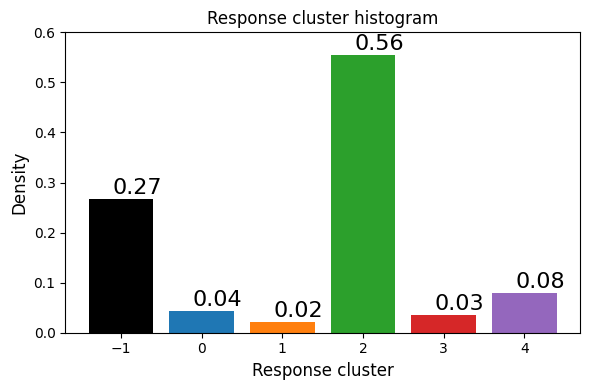

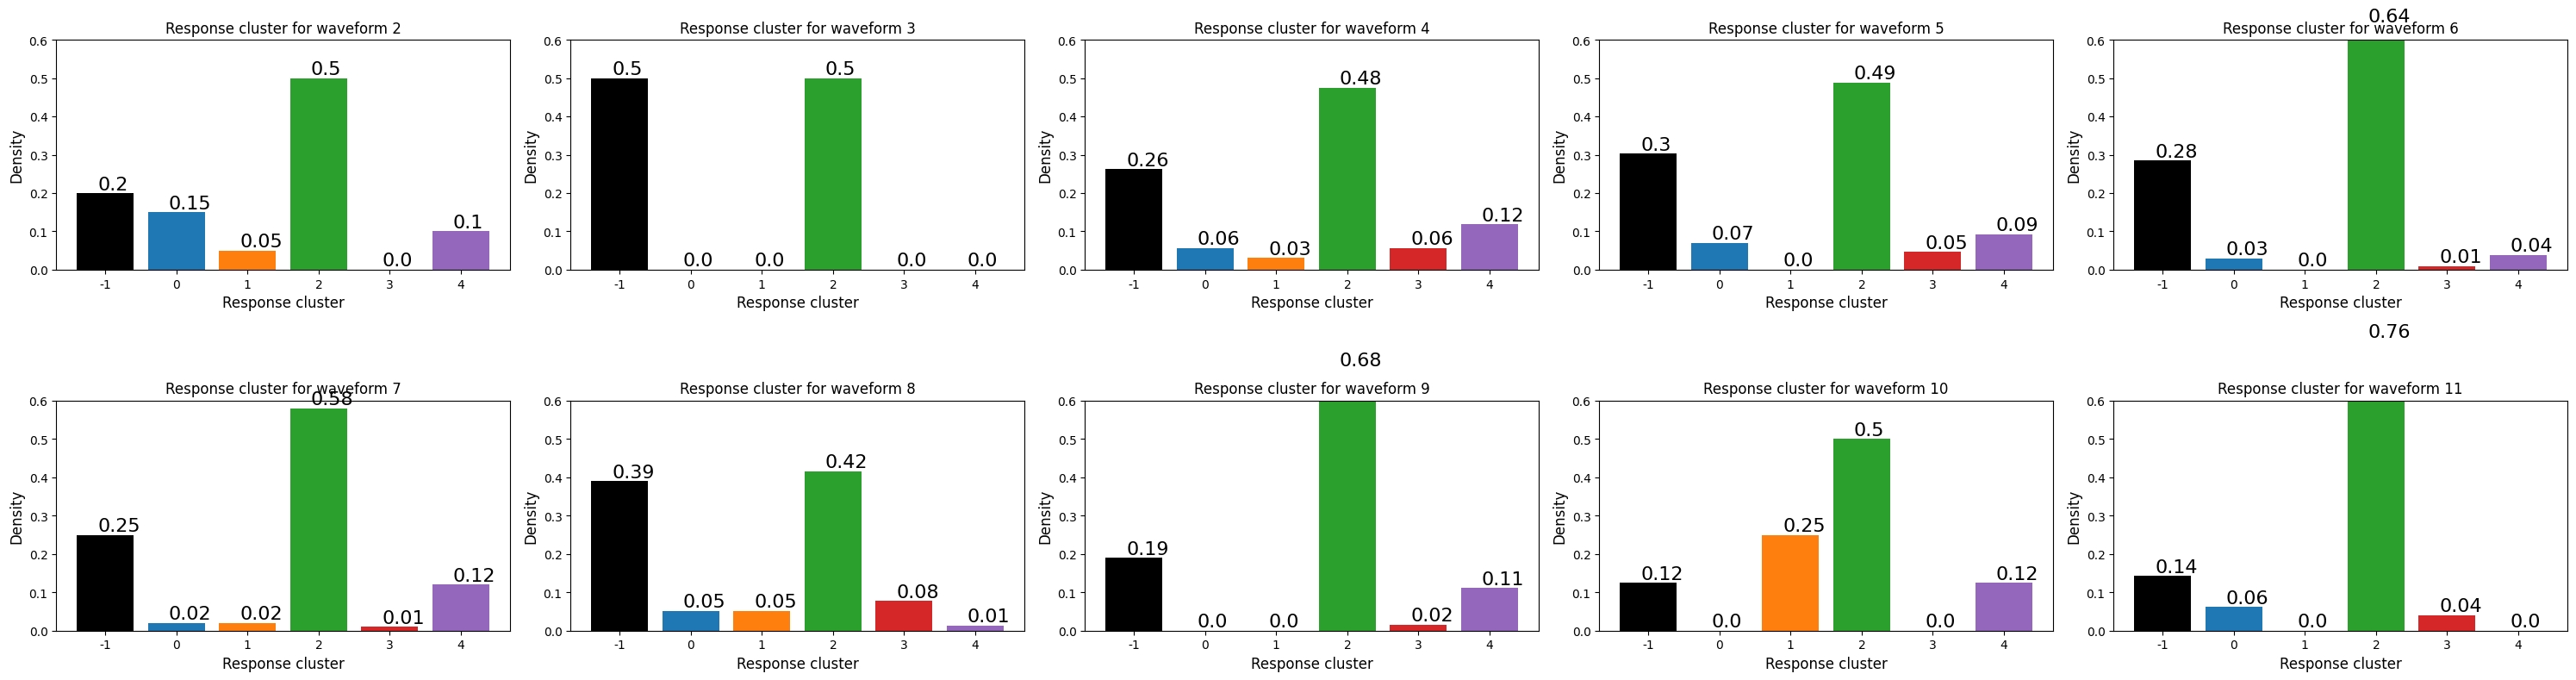

In [7]:
# count the number of each resp_cluster and plot
from collections import Counter
ckeys = list(response_color_marker.keys())
clabels = [str(c) for c in ckeys]
ccolor = [response_color_marker[k][0] for k in ckeys]
# ckeys = [-1, 0, 1, 2, 3, 4]
resp_clusters = Counter(umap_resp_df["resp_cluster"])
# sort resp_clusters by keys
resp_clusters = dict(sorted(resp_clusters.items()))
values = list(resp_clusters.values())
total = np.sum(values)
fig3, ax3 = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True)
ax3.set_title("Response cluster histogram")
ax3.bar(resp_clusters.keys(), np.array(values)/total, label=clabels, color=ccolor)
for i, v in enumerate(values):
        ax3.text(i-1.11, v/total+0.01, str(np.round(v/total, 2)), fontsize=16) 
ax3.set_xlabel("Response cluster", fontsize=12)
ax3.set_ylabel("Density", fontsize=12)
ax3.set_xticks(np.array(ckeys))
ax3.set_ylim(0, 0.6)
fig3.savefig(f"{data_folder}{slice_rec[0][:-2]}_resp_cluster_hist_final.png", dpi=300)

# for each color in umap_resp_df, plot the histogram of resp_cluster, 
# and save the figure
r, c = 0, 0
fig, ax = plt.subplots(2, 5, figsize=(6*5, 4*2), tight_layout=True)
for color in np.sort(umap_resp_df["color"].unique()):
    # count the number of each rresp_cluster for this color and plot
    # resp_cluster = {k: 0 for k in ckeys}
    resp_clusters = Counter(umap_resp_df[umap_resp_df["color"]==color]["resp_cluster"])
    values = []
    total = 0
    for k in ckeys:
        if k not in resp_clusters.keys():
            values.append(0)
        else:
            values.append(resp_clusters[k])
            total += resp_clusters[k]
    ax[r][c].bar(ckeys, np.array(values)/total, width=0.8, align="center", tick_label=ckeys, 
                   label=ckeys, color=ccolor)
    # show number on top of each bar
    for i, v in enumerate(values):
        ax[r][c].text(i-1.11, v/total+0.01, str(np.round(v/total, 2)), fontsize=16) 
    ax[r][c].set_title(f"Response cluster for waveform {color+1}")
    ax[r][c].set_xlabel("Response cluster", fontsize=12)
    ax[r][c].set_ylabel("Density", fontsize=12)
    ax[r][c].set_ylim(0, 0.6)
    ax[r][c].set_xticks(np.array(ckeys))
    c += 1
    if c == 5:
        c = 0
        r += 1

fig.savefig(f"{data_folder}{slice_rec[0][:-2]}_resp_cluster_each_waveform_final.png", dpi=300) 

In [41]:
resp_cluster_ids = [response_cluster["cluster"][slice_rec[0]][i] for i in range(len(response_cluster["cluster"][slice_rec[0]]))]
print(len(resp_cluster_ids))

228


In [ ]:
for color in np.sort(umap_df["color"].unique()):
    # count the number of each rresp_cluster for this color and plot
    # resp_cluster = {k: 0 for k in ckeys}
    resp_clusters = Counter(umap_resp_df[umap_resp_df["color"]==color]["resp_cluster"])

In [66]:
np.sort(umap_df["color"].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])